## Assignment 3: K-means Clustering Algorithm with Python

Section: ZBB<br>
Group 3:
- Eunice Chua
- Tareq Haboukh
- Fides Audrielle Urgel
- Liezel Anne Viray

### Clustering
The purpose of this assignment is to use Python to learn how to perform K-means clustering in Python, and 
find the optimal value of K.

### Instructions
Using Python, you are to complete the following questions. Please submit your answers (CODE USED 
AND OUTPUT) as PDF files.

### Please answer following questions: 
1. Find your preferred dataset from Kaggle which is appropriate for an unsupervised learning problem.<br>
https://www.kaggle.com/

    Dataset used for this assignment is from [IBM HR Analytics Attrition](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset).

2. Explore the dataset and provide information about that. You are free to use any preprocessing tools that you want.
You can explain the problem and the purpose of the dataset. Visualizing is the best approach to 
exploring the dataset.

    This dataset contains the details of 1,470 IBM employees which includes seniority level, satisfaction rates as well as their attrition data. This dataset could be used by Human Resource department to analyze the performance and satisfaction of employees. It could also help in identifying contributing factors that lead to employees leaving the organization. Kmeans clustering will aim to identify groups of employees with similar attributes. This classification model could be used for further analysis and model building to better predict employee attrition rate.

3. Perform K-means clustering algorithm on your dataset with a range of values for K to choose the optimal value with Elbow method.

    - Import K-means from sklearn.cluster.

    - Apply K-means on the dataset and get y_pred.

    - Calculate the WSS. You can write your own function or get the inertia_ attribute from the fitted model.

    - Calculate the silhouette score by using: silhouette_score(X(actual), y_kmeans(predicted)).

    - Plot the values of K vs WSS.

    - Plot the output clusters with the optimal K.

    - Plot the centers of the clusters on the previous plot and show the centroids with a larger size.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Data Importing

In [2]:
# Importing the IBM HR Analytics Attrition dataset
Attr_df = pd.read_csv("Attrition.csv")
Attr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Data Preprocessing

In [3]:
Attr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
# drop unneccessary variables: EmployeeCount, EmployeeNumber, StandardHours, Over18 
Attr_df.drop(['EmployeeCount','EmployeeNumber', 'StandardHours', 'Over18'], axis=1, inplace=True)

Attr_df.shape

(1470, 31)

In [5]:
# check if there are any Missing data points
Attr_df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [6]:
# Transform categorical into numerical variable using label encoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

categorical = Attr_df.select_dtypes(include='object').columns

print('Transforming the following {} Categorical variables into numerical:'.format(len(categorical)))

for i in categorical:
    print(i)
    Attr_df[i]=label_encoder.fit_transform(Attr_df[i]).astype('int64')

Attr_df[categorical].head().style.hide_index()

Transforming the following 8 Categorical variables into numerical:
Attrition
BusinessTravel
Department
EducationField
Gender
JobRole
MaritalStatus
OverTime


Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
1,2,2,1,0,7,2,1
0,1,1,1,1,6,1,0
1,2,1,4,1,2,2,1
0,1,1,1,0,6,1,1
0,2,1,3,1,2,1,0


In [7]:
Attr_df.dtypes

Age                         int64
Attrition                   int64
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLast

In [8]:
# check unique values per column
Attr_df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithC

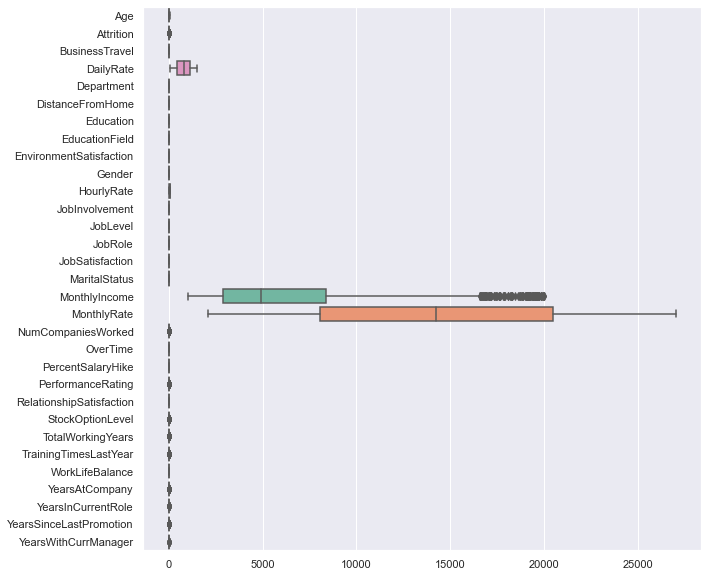

In [9]:
# boxplot
df_1= Attr_df.loc[:, Attr_df.columns]

sns.set(rc={'figure.figsize':(10,10)})
sns.boxplot(data=df_1, orient="h", palette="Set2");

### Data Scaling

In [10]:
# Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_1)
scaled_df1 = pd.DataFrame(scaler.transform(df_1),columns= df_1.columns)
scaled_df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,2.280906,0.590048,0.742527,1.401512,-1.010909,-0.891688,-0.937414,-0.660531,-1.224745,...,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-0.438422,-0.913194,-1.297775,-0.493817,-0.147150,-1.868426,-0.937414,0.254625,0.816497,...,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,2.280906,0.590048,1.414363,-0.493817,-0.887515,-0.891688,1.316673,1.169781,0.816497,...,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,-0.438422,-0.913194,1.461466,-0.493817,-0.764121,1.061787,-0.937414,1.169781,-1.224745,...,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,-0.438422,0.590048,-0.524295,-0.493817,-0.887515,-1.868426,0.565311,-1.575686,0.816497,...,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227


### Feature Selection

In [11]:
#PCA: reduce features to 2 dimension only
from sklearn.decomposition import PCA

pca_attr = PCA(n_components=2)
pca_attr.fit(scaled_df1)
PCA_df1 = pd.DataFrame(pca_attr.transform(scaled_df1), columns=(["col1","col2"]))
PCA_df1.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,1470.0,7.099385e-18,2.176639,-3.901737,-1.586664,-0.400616,1.097578,7.927667
col2,1470.0,-5.452932e-17,1.382002,-4.368912,-0.981629,0.034401,1.030095,4.495623


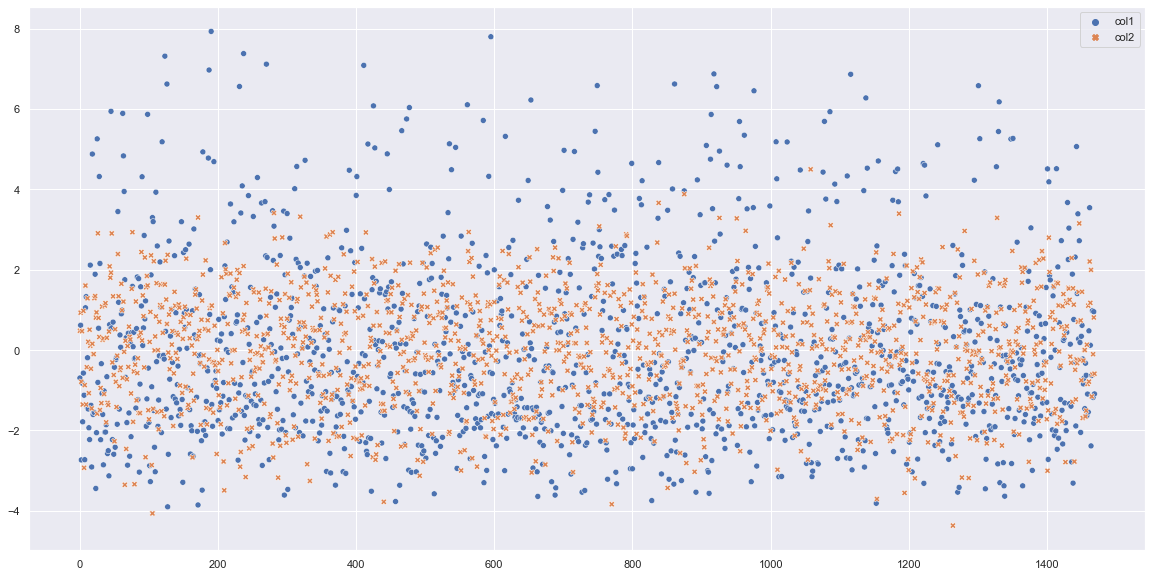

In [12]:
# original data set but reduced dimension scatter plot
sns.set(rc={'figure.figsize':(20,10)})
sns.scatterplot(data=PCA_df1);

### Data Clustering

1 :  9765.46
2 :  5178.18
3 :  3877.85
4 :  2705.24
5 :  2059.29
6 :  1781.74
7 :  1534.08
8 :  1361.41
9 :  1233.85


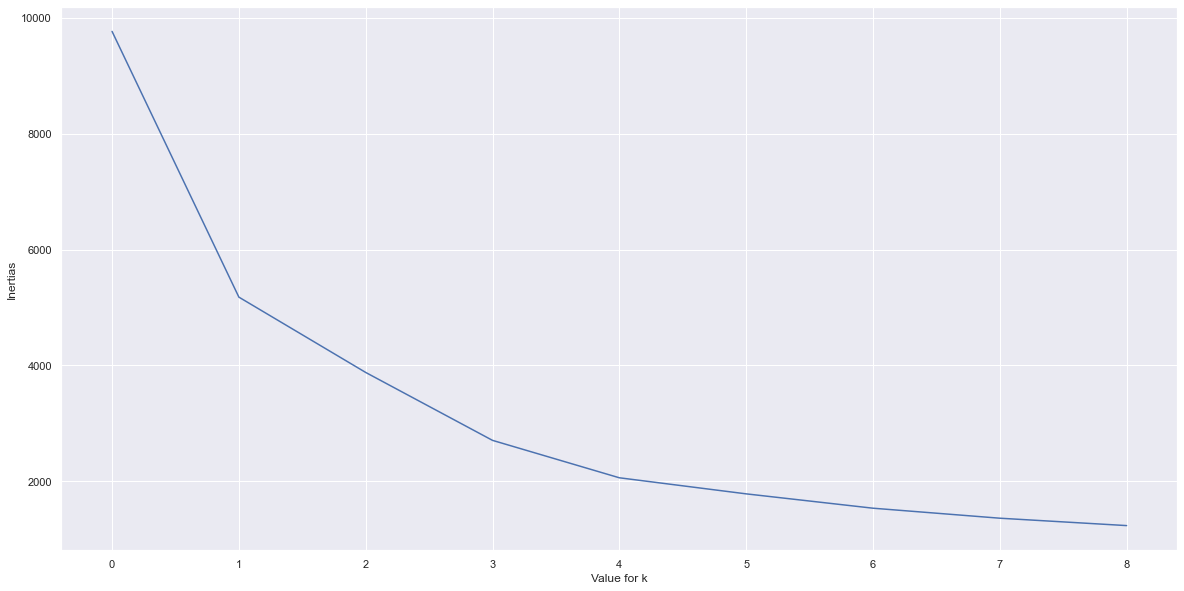

In [13]:
inertia = {}

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, max_iter=1000)
    kmeans.fit(PCA_df1)
    inertia[i] = kmeans.inertia_

for k, v in inertia.items():
    print(str(k), ': ', str(round(v,2)))


# Plot for each K value
plt.subplots()
plt.plot(list(inertia.values()))
plt.xlabel("Value for k")
plt.ylabel("Inertias")
plt.show()

In [14]:
kmeans = KMeans(n_clusters=4 , n_init=15, random_state=10)
kmeans.fit(PCA_df1)

KMeans(n_clusters=4, n_init=15, random_state=10)

In [15]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
pred_clusters = kmeans.predict(PCA_df1)

In [16]:
# inertia score
print('\nInertia in the K-means clustering',round(kmeans.inertia_,2))

#silhoutte score
print('\nSilhoutte score for K-means clustering',round(silhouette_score(PCA_df1,pred_clusters),4))


Inertia in the K-means clustering 2705.24

Silhoutte score for K-means clustering 0.3835


In [17]:
# dataframe with label attached for kmeans clustering 
Attr_dfkmean = PCA_df1.copy()
Attr_dfkmean['label'] = labels
Attr_dfkmean.head()

,col1,col2,label
0,-0.696076,0.478191,2
1,0.616857,0.929435,1
2,-2.735275,-0.788440,2
3,-0.822928,0.469346,2
4,-1.786719,-1.355992,2


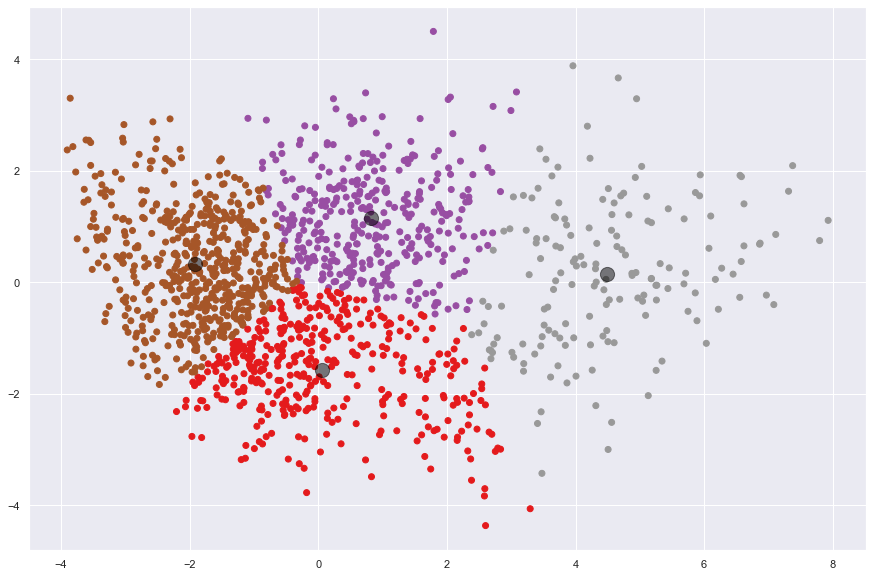

In [18]:
plt.figure(figsize=(15,10))
plt.scatter(Attr_dfkmean[Attr_dfkmean.columns[0]],Attr_dfkmean[Attr_dfkmean.columns[1]],c=kmeans.labels_ , cmap=plt.cm.Set1)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5)
plt.show()

### KMeans without PCA

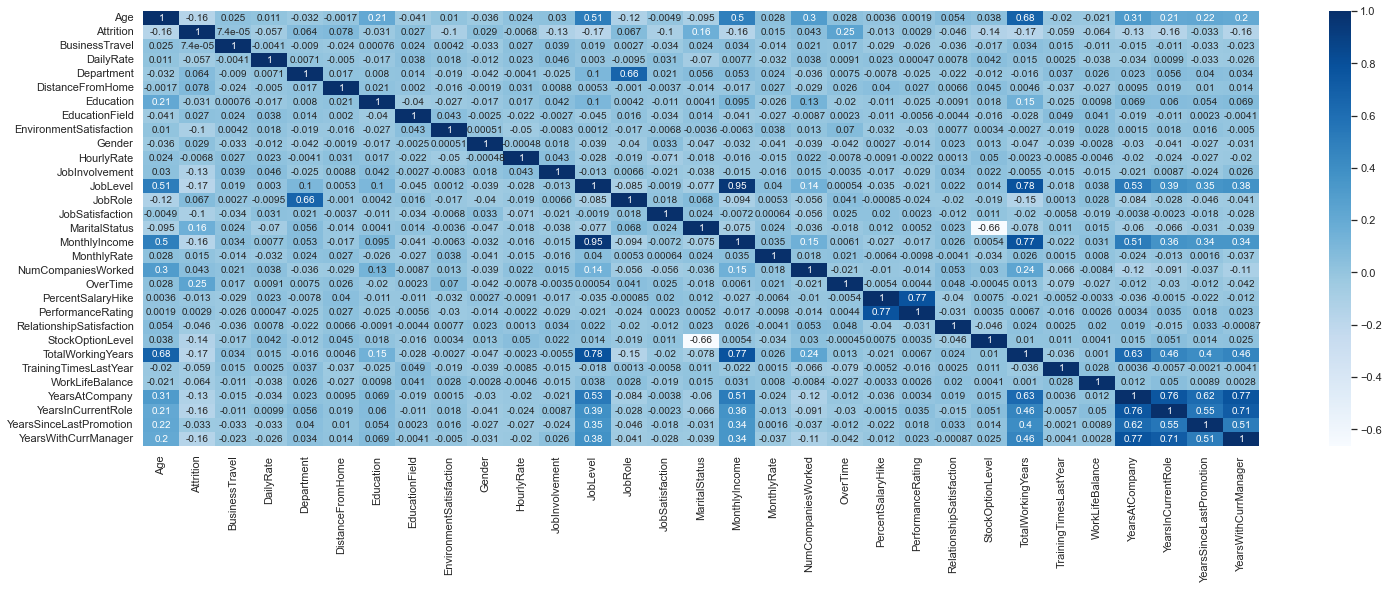

In [19]:
%matplotlib inline
plt.figure(figsize=(25,8))
sns.heatmap(scaled_df1.corr(),annot=True,cmap='Blues');

1 :  45570.0
2 :  40965.41
3 :  39119.87
4 :  37702.47
5 :  36567.85
6 :  35545.92
7 :  34709.66
8 :  34102.06
9 :  33669.48
10 :  33294.31
11 :  32913.86
12 :  32585.57
13 :  32391.24
14 :  32084.9
15 :  31864.9
16 :  31634.6
17 :  31351.17
18 :  31232.45
19 :  31151.88
20 :  30865.84
21 :  30666.56
22 :  30385.04
23 :  30337.12
24 :  30291.81
25 :  30107.95
26 :  29994.41
27 :  29719.03
28 :  29569.76
29 :  29554.96
30 :  29325.69


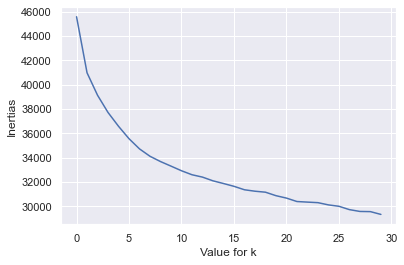

In [20]:
inertia = {}

for i in range(1, 31):
    kmeans = KMeans(n_clusters=i, max_iter=1000)
    kmeans.fit(scaled_df1)
    inertia[i] = kmeans.inertia_

for k, v in inertia.items():
    print(str(k), ': ', str(round(v,2)))


# Plot for each K value
plt.subplots()
plt.plot(list(inertia.values()))
plt.xlabel("Value for k")
plt.ylabel("Inertias")
plt.show()

In [21]:
kmeans = KMeans(n_clusters=11 , n_init=15, random_state=10)
kmeans.fit(scaled_df1)

KMeans(n_clusters=11, n_init=15, random_state=10)

In [22]:
centroids = kmeans.cluster_centers_
pred_clusters = kmeans.predict(scaled_df1)
labels = kmeans.labels_

In [23]:
# inertia score
print('\nInertia in the K-means clustering',round(kmeans.inertia_,2))

# silhoutte score
print('\nSilhoutte score for K-means clustering',round(silhouette_score(scaled_df1,pred_clusters),4))


Inertia in the K-means clustering 32879.26

Silhoutte score for K-means clustering 0.0466


In [24]:
scaled_df1['cluster_kmeans'] = labels
scaled_df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,cluster_kmeans
0,0.446350,2.280906,0.590048,0.742527,1.401512,-1.010909,-0.891688,-0.937414,-0.660531,-1.224745,...,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834,7
1,1.322365,-0.438422,-0.913194,-1.297775,-0.493817,-0.147150,-1.868426,-0.937414,0.254625,0.816497,...,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541,9
2,0.008343,2.280906,0.590048,1.414363,-0.493817,-0.887515,-0.891688,1.316673,1.169781,0.816497,...,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935,7
3,-0.429664,-0.438422,-0.913194,1.461466,-0.493817,-0.764121,1.061787,-0.937414,1.169781,-1.224745,...,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935,6
4,-1.086676,-0.438422,0.590048,-0.524295,-0.493817,-0.887515,-1.868426,0.565311,-1.575686,0.816497,...,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227,6


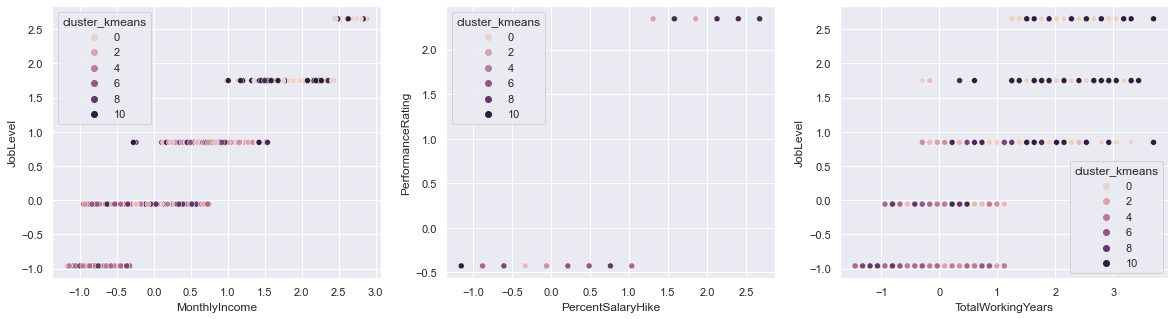

In [25]:
fig, axs = plt.subplots(1,3, figsize = (20,5))

plt.subplot(1,3,1)
sns.scatterplot(data=scaled_df1, x="MonthlyIncome", y="JobLevel", hue="cluster_kmeans");

plt.subplot(1,3,2)
sns.scatterplot(data=scaled_df1, x="PercentSalaryHike", y="PerformanceRating", hue="cluster_kmeans");

plt.subplot(1,3,3)
sns.scatterplot(data=scaled_df1, x="TotalWorkingYears", y="JobLevel", hue="cluster_kmeans");